In [2]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from scipy import interpolate
from operator import itemgetter
import matplotlib as mpl

plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 16})

# Finding the Optimal Lowercut Value (TAME parameter) per Line
The lowercut value appears to be key to TAME assigning a good equivalent width measurement for a given line. This notebook uses measurements taken from ~20 stars at 10 different lowercut values to find the best lowercut value per line. Note that a lowercut value seems to be a SNR dependent parameter, so it might not be as simple as just finding a universal value per line.

In [65]:
# Take a look at one cluster

outputs = glob.glob("tame-1.1.0/col110*.json")
by_hand = glob.glob("tame-1.1.0/col110*.ew")


d = {'JSON File': outputs, 'By-Hand File': by_hand}
disp_df = pd.DataFrame(data=d)
disp_df


,By-Hand File,JSON File
0,tame-1.1.0/col110_1134red_oned_25jan14.ew,tame-1.1.0/col110_1134red_oned_25jan14.json
1,tame-1.1.0/col110_2119red_oned_26jan14.ew,tame-1.1.0/col110_2119red_oned_26jan14.json
2,tame-1.1.0/col110_2129red_oned_25jan14.ew,tame-1.1.0/col110_2129red_oned_25jan14.json
3,tame-1.1.0/col110_2223red_oned_26jan14.ew,tame-1.1.0/col110_2223red_oned_26jan14.json
4,tame-1.1.0/col110_3122red_oned_mar2014.ew,tame-1.1.0/col110_3122red_oned_mar2014.json
5,tame-1.1.0/col110_3144red_oned_mar2014.ew,tame-1.1.0/col110_3144red_oned_mar2014.json
6,tame-1.1.0/col110_3244red_oned_25jan14.ew,tame-1.1.0/col110_3244red_oned_25jan14.json
7,tame-1.1.0/col110_4260red_oned_26jan14.ew,tame-1.1.0/col110_4260red_oned_26jan14.json
8,tame-1.1.0/col110_5125red_oned_26jan14.ew,tame-1.1.0/col110_5125red_oned_26jan14.json
9,tame-1.1.0/ngc2204_1124red_oned_05jan14.ew,tame-1.1.0/ngc2204_1124red_oned_05jan14.json


In [61]:
for i in range(len(outputs)):
    with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
        jsondata = json.load(jsonfile)
        handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
        hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
        key = list(jsondata.keys())[0]
        lowercut = [cut for cut,ew in jsondata[key]]
        print(outputs[i],len(lowercut))

tame-1.1.0/col110_1134red_oned_25jan14.json 10
tame-1.1.0/col110_2119red_oned_26jan14.json 10
tame-1.1.0/col110_2129red_oned_25jan14.json 10
tame-1.1.0/col110_2223red_oned_26jan14.json 10
tame-1.1.0/col110_3122red_oned_mar2014.json 10
tame-1.1.0/col110_3144red_oned_mar2014.json 10
tame-1.1.0/col110_3244red_oned_25jan14.json 10
tame-1.1.0/col110_4260red_oned_26jan14.json 10
tame-1.1.0/col110_5125red_oned_26jan14.json 10


10
col110_1134red_oned_25jan14
N Solutions: 3
Optimal Lowercut Values: [ 0.96243549  0.97721435  0.98152211]
10
col110_2119red_oned_26jan14
N Solutions: 1
Optimal Lowercut Values: [ 0.98963927]
10
col110_2129red_oned_25jan14
N Solutions: 1
Optimal Lowercut Values: [ 0.99158186]
10
col110_2223red_oned_26jan14
N Solutions: 5
Optimal Lowercut Values: [ 0.96731351  0.97178911  0.97830548  0.98320964  0.98873188]
10
col110_3122red_oned_mar2014
N Solutions: 1
Optimal Lowercut Values: [ 0.9872839]
10
col110_3144red_oned_mar2014
N Solutions: 1
Optimal Lowercut Values: [ 0.97428196]
10
col110_3244red_oned_25jan14
N Solutions: 1
Optimal Lowercut Values: [ 0.97875598]
10
col110_4260red_oned_26jan14
N Solutions: 5
Optimal Lowercut Values: [ 0.95097511  0.95970009  0.965       0.97        0.985     ]
10
col110_5125red_oned_26jan14
N Solutions: 1
Optimal Lowercut Values: [ 0.96293336]


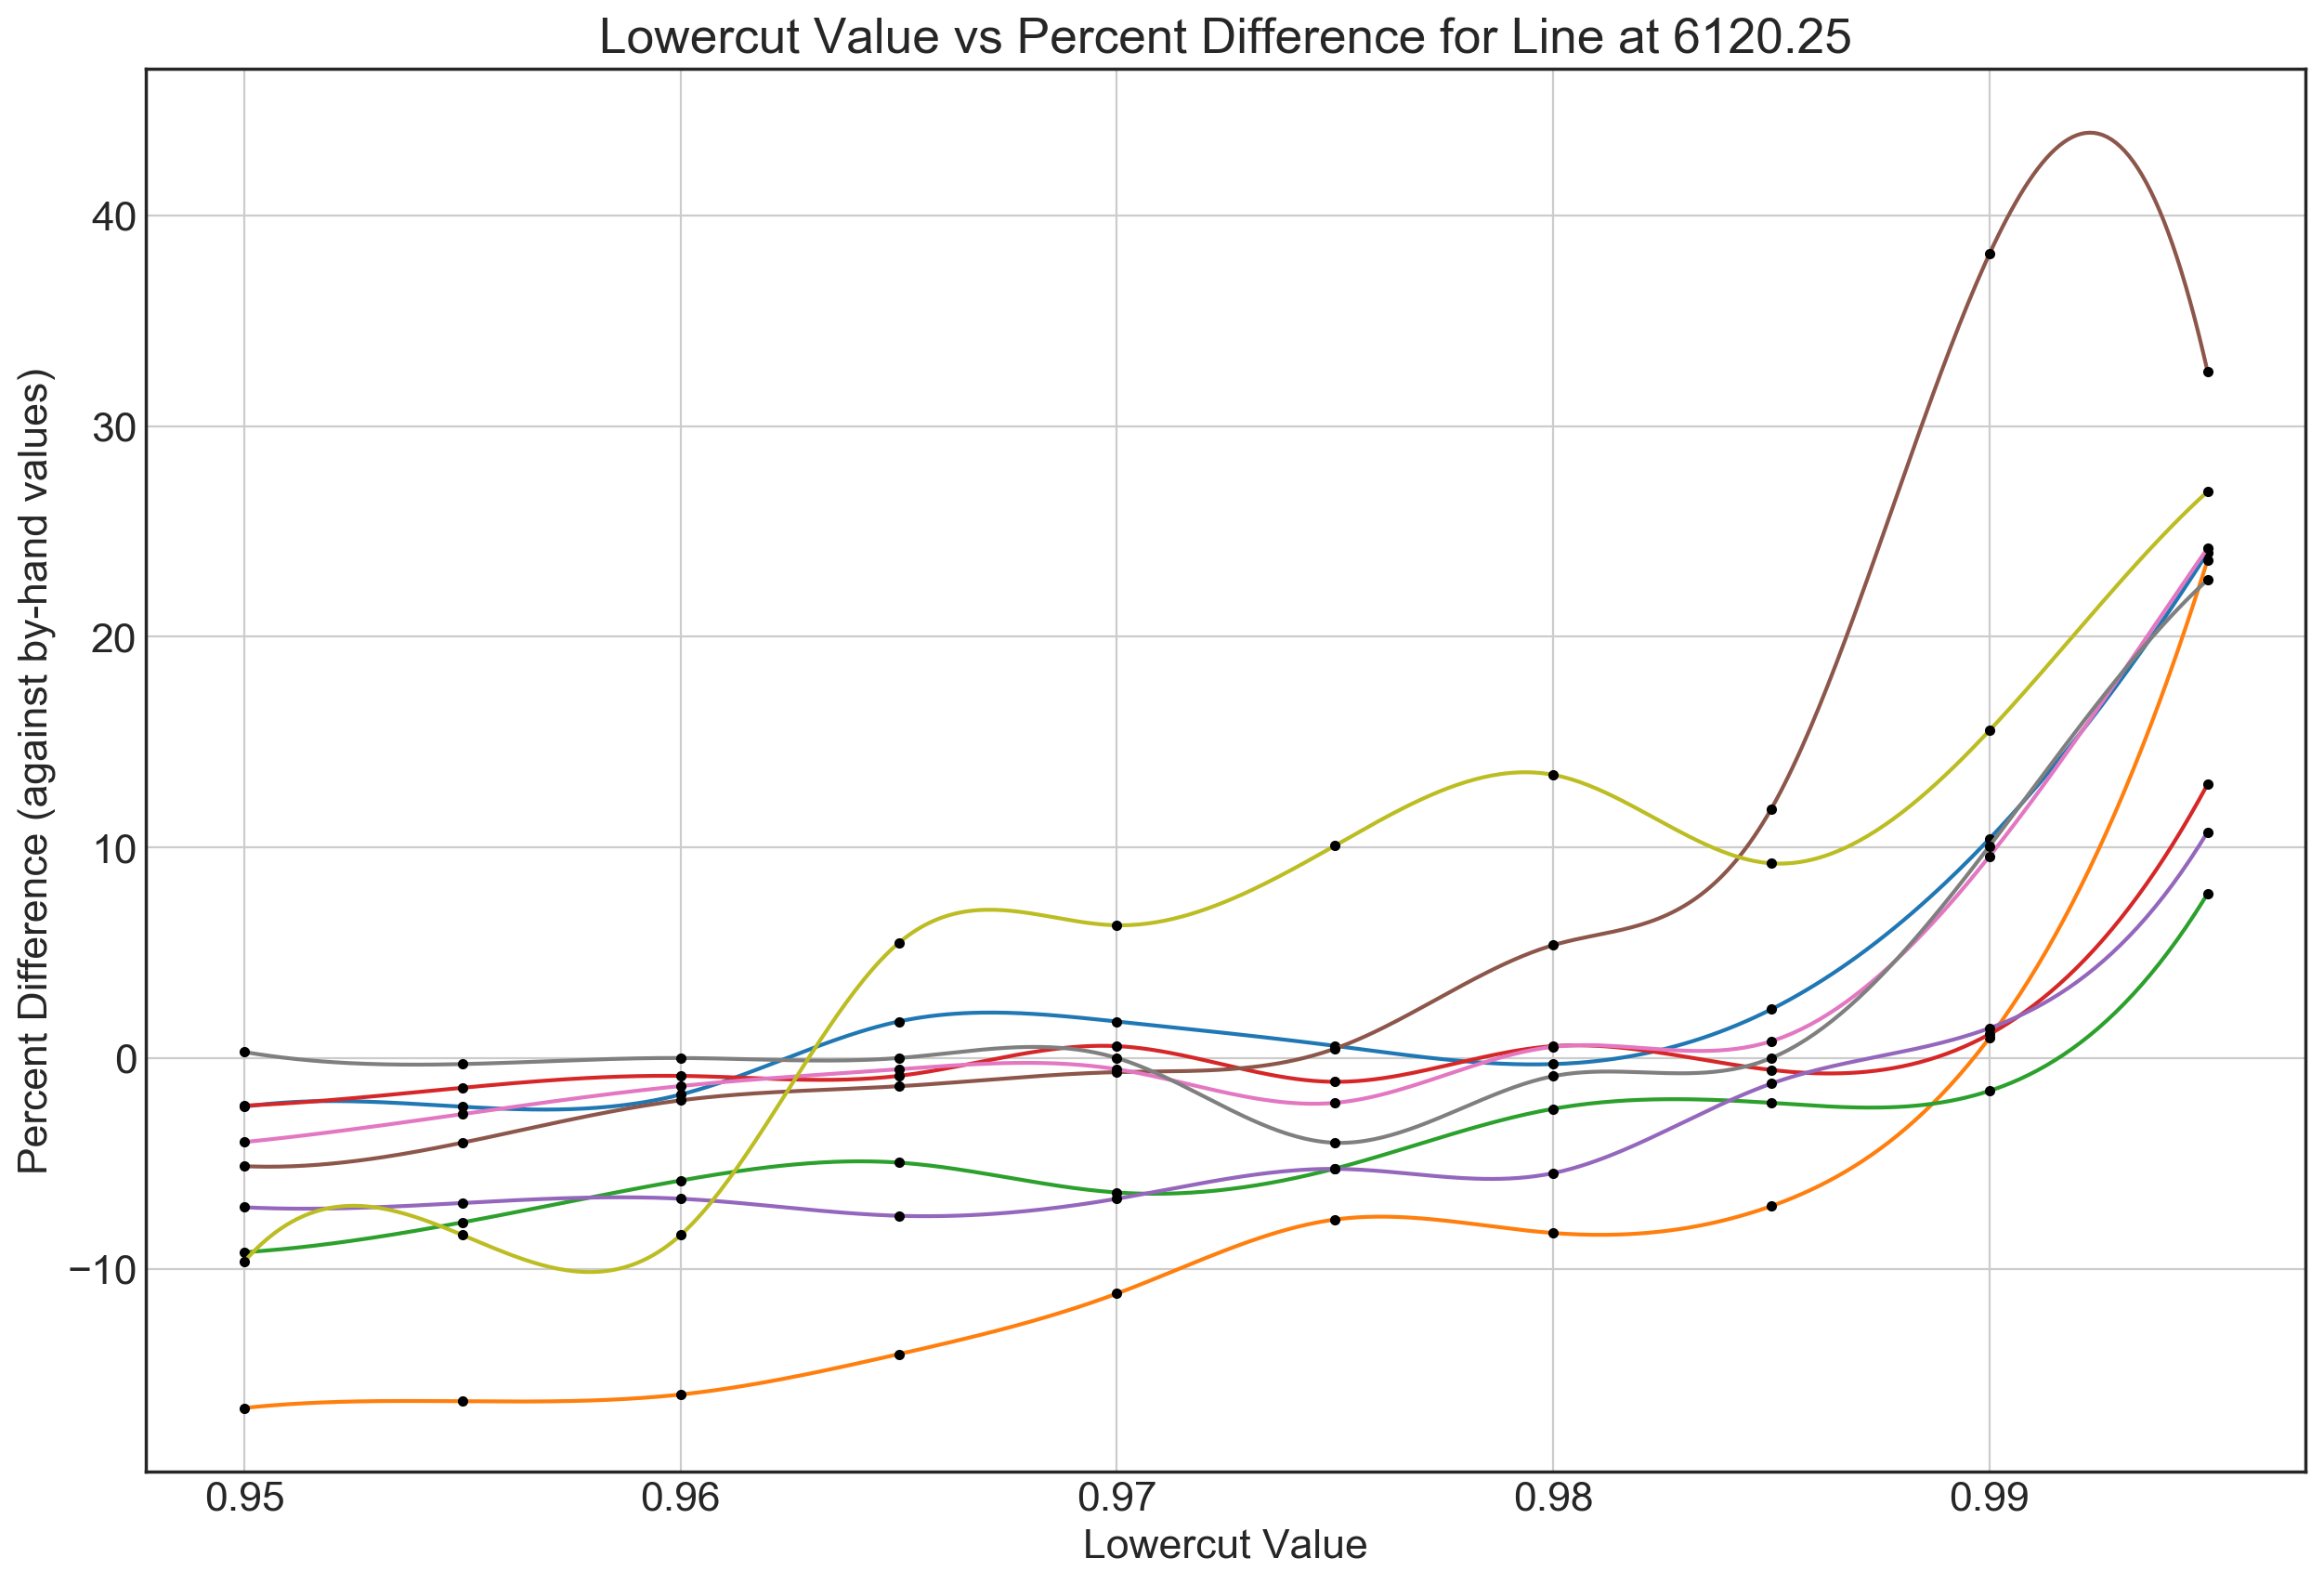

In [64]:
# Find optimal lowercut value

plt.figure(figsize=(15,10),dpi=200)


for i in range(len(outputs)):
    with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
        jsondata = json.load(jsonfile)
        handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
        hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
        key = list(jsondata.keys())[0]
        lowercut = [cut for cut,ew in jsondata[key]]
        ew_meas = [ew for cut,ew in jsondata[key]]
        if hand_dict[key] == 0:
            print("SKIPPED STAR: By-Hand Value of 0")
            continue
        ew_pdiff = ((np.array(ew_meas)-hand_dict[key])/hand_dict[key]) * 100
        
        lowercut_space = np.arange(0.95,0.995,0.0001)
        print(len(lowercut))
        f = interpolate.UnivariateSpline(lowercut, ew_pdiff, s=0)
        lowcut_roots = f.roots()
        if len(lowcut_roots) == 0:
            if min(abs(ew_pdiff)) > 10:
                print("WARNING: No good value found, using closest")
            opt_lowcut = [lowercut[np.argmin(ew_pdiff)]]
        else:
            opt_lowcut = lowcut_roots


        #yToFind = 0
        #yreduced = np.array(ew_pdiff) - yToFind
        #freduced = interpolate.UnivariateSpline(lowercut, yreduced, s=0)
        #opt_lowcut = freduced.roots()

        label = disp_df['JSON File'][i].split('/')[-1].split('.')[0]
        print(label)
        print("N Solutions: {}".format(len(lowcut_roots)))
        print("Optimal Lowercut Values: {}".format(opt_lowcut))
        #print(hand_dict[key],ew_meas[0])
        
        
        plt.plot(lowercut_space, f(lowercut_space),'-',label = label)
        plt.plot(lowercut,ew_pdiff,'.',color='k')


plt.title("Lowercut Value vs Percent Difference for Line at {}".format(key))
plt.xlabel("Lowercut Value")
plt.ylabel("Percent Difference (against by-hand values)")
plt.grid()
#plt.legend()